# Titanic Dataset with H2O.ai 

**By - Yashasvi Jariwala**

Data set: Titanic Dataset ("https://www.kaggle.com/c/titanic/data")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [7]:
pwd

'/Users/yashasvijariwala'

In [8]:
cd Desktop

/Users/yashasvijariwala/Desktop


In [23]:
cd all

[Errno 2] No such file or directory: 'all'
/Users/yashasvijariwala/Desktop/all


In [24]:
data_train_all = pd.read_csv("train.csv")
data_test_all =pd.read_csv("test.csv")

In [25]:
data_test_all_pred=pd.read_csv("test.csv")      ## This dataframe will be used in the last . This Dataframe doesn't have much significance

In [26]:
data_train_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
data_train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Columns Age , Cabin and Embarked has missing Values in training data

In [28]:
data_test_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Columns Age, Cabin, Fare have Missing Values in Test Set.

# Data Pre-Processing

Column: Name : Feature Engineer Column 'Name'

Regular Expression

In [29]:
import re

In [30]:
data_train_all['Title']= data_train_all.Name.apply(lambda a:re.search(' ([A-Z][a-z]+)\.',a).group(1))

In [31]:
data_test_all['Title'] = data_test_all.Name.apply(lambda a:re.search(' ([A-Z][a-z]+)\.',a).group(1))

In [32]:
data_train_all['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [33]:
data_train_all.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Mme           1
Don           1
Sir           1
Capt          1
Name: Title, dtype: int64

In [34]:
data_test_all.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [35]:
data_train_all['Title'] = data_train_all['Title'].replace(['Mlle','Ms'],'Miss')  
data_train_all['Title'] = data_train_all['Title'].replace('Mme','Mrs')
data_train_all['Title'] = data_train_all['Title'].replace(['Capt','Col','Major'],'Army')
data_train_all['Title'] = data_train_all['Title'].replace(['Countess','Don','Dona','Jonkheer','Lady','Sir'],'Noble')

In [36]:
data_test_all['Title'] = data_test_all['Title'].replace(['Mlle','Ms'],'Miss')  
data_test_all['Title'] = data_test_all['Title'].replace('Mme','Mrs')
data_test_all['Title'] = data_test_all['Title'].replace(['Capt','Col','Major'],'Army')
data_test_all['Title'] = data_test_all['Title'].replace(['Countess','Don','Dona','Jonkheer','Lady','Sir'],'Noble')

In [37]:
data_train_all['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Dr          7
Rev         6
Army        5
Noble       5
Name: Title, dtype: int64

In [38]:
data_test_all['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Army        2
Rev         2
Dr          1
Noble       1
Name: Title, dtype: int64

Column:Drop the Column Ticket

In [39]:
data_train_all=data_train_all.drop(columns='Ticket')  
## we could have also used (inplace= True) and then we need not do data_train _all= data_train_all.drop(xxxxxx)

In [40]:
data_test_all=data_test_all.drop(columns='Ticket')

**Column: Cabin: The Nan values in the Cabin column means that the passangers didnt had the cabin.**

In [42]:
f= lambda x: str(x)[0]

In [43]:
data_train_all.Cabin=data_train_all.Cabin.apply(f)

In [44]:
data_train_all['Cabin']=data_train_all['Cabin'].replace(['T'],'n')

In [45]:
data_test_all.Cabin=data_test_all.Cabin.apply(f)

In [46]:
data_train_all.Cabin.value_counts()

n    688
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: Cabin, dtype: int64

In [47]:
data_test_all.Cabin.value_counts()

n    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

In [48]:
data_train_all.groupby(['Cabin'])['Survived'].sum()

Cabin
A      7
B     35
C     35
D     25
E     24
F      8
G      2
n    206
Name: Survived, dtype: int64

Column: Age: Missing Value Treatment

In [49]:
data_train_all.groupby(['Sex'])['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [50]:
data_train_all.Age.median()

28.0

In [51]:
data_train_all.groupby(['Pclass']).Age.mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [52]:
## we will be replaceing Age by median value

In [53]:
data_train_all.Age=data_train_all.Age.fillna(data_train_all.Age.median())

In [54]:
data_test_all.Age=data_test_all.Age.fillna(data_train_all.Age.median())

Discretization of the Numeric columns : Age¶

In [55]:
data_train_all.Age=pd.cut(data_train_all.Age, bins=[0,20,40,60,80,100],right=True, labels=False, retbins=0, include_lowest=1)

In [56]:
data_test_all.Age=pd.cut(data_test_all.Age, bins=[0,20,40,60,80,100],right=True, labels=False, retbins=0, include_lowest=1)

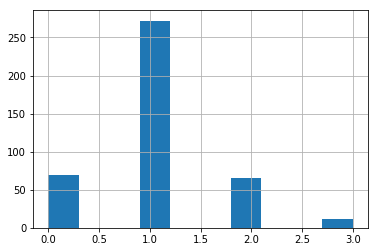

In [57]:
data_test_all.Age.hist()

Discretization of the Numeric columns : Fare

In [58]:
data_train_all.Fare.min()

0.0

In [59]:
data_train_all.Fare=pd.cut(data_train_all.Fare, bins=[0,10,20,30,40,50,100,600],right=True, labels=False, retbins=0, include_lowest=1)

In [60]:
data_train_all.Fare.value_counts()

0    336
1    179
2    142
5    107
3     58
6     53
4     16
Name: Fare, dtype: int64

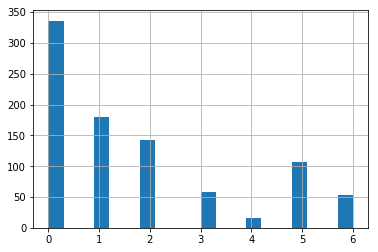

In [61]:
data_train_all.Fare.hist(bins=20)

In [62]:
data_test_all.Fare=pd.cut(data_test_all.Fare, bins=[0,10,20,30,40,50,100,600],right=True, labels=False, retbins=0, include_lowest=1)

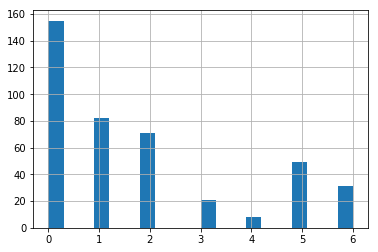

In [63]:
data_test_all.Fare.hist(bins=20)

In [64]:
data_train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null int64
Cabin          891 non-null object
Embarked       889 non-null object
Title          891 non-null object
dtypes: int64(7), object(5)
memory usage: 83.6+ KB


In [65]:
data_test_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
Title          418 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 36.0+ KB


In [66]:
### Missing Value Treatment of Column Fare in Test Set

In [67]:
data_test_all.Fare.fillna(0,inplace=True)

In [68]:
data_test_all.Fare.value_counts()

0.0    156
1.0     82
2.0     71
5.0     49
6.0     31
3.0     21
4.0      8
Name: Fare, dtype: int64

# Missing Value Treatment of the Column Embark in the Training Set.

In [69]:
data_train_all.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [70]:
data_train_all.Embarked.fillna('S', inplace=True)

In [71]:
data_train_all.drop(columns=['Name','PassengerId'],inplace=True)

In [72]:
data_train_all.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,1,1,0,0,n,S,Mr
1,1,1,female,1,1,0,5,C,C,Mrs
2,1,3,female,1,0,0,0,n,S,Miss
3,1,1,female,1,1,0,5,C,S,Mrs
4,0,3,male,1,0,0,0,n,S,Mr


In [73]:
data_test_all.drop(columns=['Name','PassengerId'],inplace=True)

In [74]:
data_test_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null int64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Cabin       418 non-null object
Embarked    418 non-null object
Title       418 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 29.5+ KB


In [75]:
type(data_train_all.Title[2])

str

In [76]:
## Create the dummy variables

In [77]:
data_train_all=pd.get_dummies(data_train_all,drop_first=False)  
## In case of categorical variable you dont need to drop one dummy variable.

In [78]:
data_test_all=pd.get_dummies(data_test_all,drop_first=False) 

In [79]:
data_train_all.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Embarked_Q,Embarked_S,Title_Army,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Rev
0,0,3,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,1,1,1,0,5,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,1,1,1,0,5,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,3,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [80]:
data_test_all.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,...,Embarked_Q,Embarked_S,Title_Army,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Rev
0,3,1,0,0,0.0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,3,2,1,0,0.0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,2,3,0,0,0.0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,3,1,0,0,0.0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,3,1,1,1,1.0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [81]:
data_train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 27 columns):
Survived        891 non-null int64
Pclass          891 non-null int64
Age             891 non-null int64
SibSp           891 non-null int64
Parch           891 non-null int64
Fare            891 non-null int64
Sex_female      891 non-null uint8
Sex_male        891 non-null uint8
Cabin_A         891 non-null uint8
Cabin_B         891 non-null uint8
Cabin_C         891 non-null uint8
Cabin_D         891 non-null uint8
Cabin_E         891 non-null uint8
Cabin_F         891 non-null uint8
Cabin_G         891 non-null uint8
Cabin_n         891 non-null uint8
Embarked_C      891 non-null uint8
Embarked_Q      891 non-null uint8
Embarked_S      891 non-null uint8
Title_Army      891 non-null uint8
Title_Dr        891 non-null uint8
Title_Master    891 non-null uint8
Title_Miss      891 non-null uint8
Title_Mr        891 non-null uint8
Title_Mrs       891 non-null uint8
Title_Noble     891 

In [82]:
## Column Family

In [83]:
data_train_all['Family']=data_train_all['SibSp']+data_train_all['Parch']

In [84]:
data_test_all['Family']=data_test_all['SibSp']+data_test_all['Parch']

In [85]:
data_train_all.drop(columns=['SibSp','Parch'],inplace=True)
data_test_all.drop(columns=['SibSp','Parch'],inplace=True)

In [86]:
data_test_all.Family.value_counts()

0     253
1      74
2      57
3      14
4       7
10      4
6       4
5       3
7       2
Name: Family, dtype: int64

In [87]:
data_test_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 25 columns):
Pclass          418 non-null int64
Age             418 non-null int64
Fare            418 non-null float64
Sex_female      418 non-null uint8
Sex_male        418 non-null uint8
Cabin_A         418 non-null uint8
Cabin_B         418 non-null uint8
Cabin_C         418 non-null uint8
Cabin_D         418 non-null uint8
Cabin_E         418 non-null uint8
Cabin_F         418 non-null uint8
Cabin_G         418 non-null uint8
Cabin_n         418 non-null uint8
Embarked_C      418 non-null uint8
Embarked_Q      418 non-null uint8
Embarked_S      418 non-null uint8
Title_Army      418 non-null uint8
Title_Dr        418 non-null uint8
Title_Master    418 non-null uint8
Title_Miss      418 non-null uint8
Title_Mr        418 non-null uint8
Title_Mrs       418 non-null uint8
Title_Noble     418 non-null uint8
Title_Rev       418 non-null uint8
Family          418 non-null int64
dtypes: float64(1)

In [88]:
data_train_all.Fare=data_train_all.Fare.astype(float)

In [89]:
data_train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
Survived        891 non-null int64
Pclass          891 non-null int64
Age             891 non-null int64
Fare            891 non-null float64
Sex_female      891 non-null uint8
Sex_male        891 non-null uint8
Cabin_A         891 non-null uint8
Cabin_B         891 non-null uint8
Cabin_C         891 non-null uint8
Cabin_D         891 non-null uint8
Cabin_E         891 non-null uint8
Cabin_F         891 non-null uint8
Cabin_G         891 non-null uint8
Cabin_n         891 non-null uint8
Embarked_C      891 non-null uint8
Embarked_Q      891 non-null uint8
Embarked_S      891 non-null uint8
Title_Army      891 non-null uint8
Title_Dr        891 non-null uint8
Title_Master    891 non-null uint8
Title_Miss      891 non-null uint8
Title_Mr        891 non-null uint8
Title_Mrs       891 non-null uint8
Title_Noble     891 non-null uint8
Title_Rev       891 non-null uint8
Family          89

# Part 2

# Implementation of GBM in H2O.ai for predicting

In [90]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_161"; Java(TM) SE Runtime Environment (build 1.8.0_161-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.161-b12, mixed mode)
  Starting server from /anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/1p/9ykp1qd57gd26nrw11zjq09c0000gn/T/tmpgm7dz5b2
  JVM stdout: /var/folders/1p/9ykp1qd57gd26nrw11zjq09c0000gn/T/tmpgm7dz5b2/h2o_yashasvijariwala_started_from_python.out
  JVM stderr: /var/folders/1p/9ykp1qd57gd26nrw11zjq09c0000gn/T/tmpgm7dz5b2/h2o_yashasvijariwala_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.3
H2O cluster version age:,3 months and 21 days !!!
H2O cluster name:,H2O_from_python_yashasvijariwala_1ja6gp
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


Convert Data from Pandas Data Frame to H2O data Frame

In [91]:
data_train_h2o=h2o.H2OFrame(data_train_all)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [92]:
data_test_h2o=h2o.H2OFrame(data_test_all)

Parse progress: |█████████████████████████████████████████████████████████| 100%


Check the type of the data after conversion

In [93]:
type(data_test_h2o)

h2o.frame.H2OFrame

NOTE : Always remember to convert the Target variable in training Data Set as Factor or categorical variable. Else the the H2O's GBM algorithm will not create a classification algorithm.

In [94]:
data_train_h2o['Survived']=data_train_h2o['Survived'].asfactor()    ## Converting Target Variable as Factor

In [95]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator  # import gbm estimator

In [96]:
model = H2OGradientBoostingEstimator(## more trees is better if the learning rate is small enough 
  ## here, use "more than enough" trees - we have early stopping
  ntrees = 10000,                                                            

  ## smaller learning rate is better (this is a good value for most datasets, but see below for annealing)
  learn_rate = 0.01,                                                         

  ## early stopping once the validation AUC doesn't improve by at least 0.01% for 5 consecutive scoring events
  stopping_rounds = 5, stopping_tolerance = 1e-4, stopping_metric = "AUC", 

  ## sample 80% of rows per tree
  sample_rate = 0.8,                                                       

  ## sample 80% of columns per split
  col_sample_rate = 0.8,                                                   

  ## fix a random number generator seed for reproducibility
  seed = 1234,                                                             

  ## score every 10 trees to make early stopping reproducible (it depends on the scoring interval)
  score_tree_interval = 10, nfolds=5, max_depth=3)   ## Instantiating the class

Train the model.

In [97]:
model.train(x=data_train_h2o.names[1:],y=data_train_h2o.names[0], training_frame=data_train_h2o, model_id="GBM_Titanic",
            validation_frame=data_train_h2o)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [98]:
dir(model)

['F0point5',
 'F1',
 'F2',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bc',
 '_bcin',
 '_check_targets',
 '_compute_algo',
 '_estimator_type',
 '_future',
 '_get_metrics',
 '_have_mojo',
 '_have_pojo',
 '_id',
 '_is_xvalidated',
 '_job',
 '_keyify_if_h2oframe',
 '_metrics_class',
 '_model_json',
 '_parms',
 '_plot',
 '_requires_training_frame',
 '_resolve_model',
 '_verify_training_frame_params',
 '_xval_keys',
 'accuracy',
 'actual_params',
 'aic',
 'algo',
 'auc',
 'balance_classes',
 'biases',
 'build_tree_one_node',
 'calibrate_model',
 'calibration_frame',
 'categorical_encoding',
 'catoffsets',
 'checkpoint',
 'class_sampling_factors',
 'coe

5 fold Cross Validation Score

 1. Accuracy Metric   : the mean accuracy of the model is 83.8% and the std dev is 2.3%
 2. auc Metric        : Mean AUC is 87% 


 From these metrics we can say that our model is fairly ok.
 We can further improve it by parameter tuning.

In [99]:
model.cross_validation_metrics_summary()

Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.8381619,0.0232680,0.8378378,0.7885714,0.8555555,0.8870056,0.8218391
auc,0.8700411,0.0140836,0.8921354,0.8446817,0.8569504,0.8947584,0.8616796
err,0.1618381,0.0232680,0.1621622,0.2114286,0.1444445,0.1129943,0.1781609
err_count,28.8,3.9849718,30.0,37.0,26.0,20.0,31.0
f0point5,0.7930275,0.0335072,0.7775119,0.7402598,0.8012820,0.8793104,0.7667732
f1,0.7906178,0.0224265,0.8125,0.7549669,0.7936508,0.8360656,0.7559055
f2,0.7898871,0.0247799,0.8507853,0.7702703,0.7861635,0.796875,0.7453416
lift_top_group,2.1342483,0.7578353,2.5,0.0,2.8125,2.6818182,2.676923
logloss,0.4416493,0.0123475,0.4347701,0.4613028,0.4359076,0.4154028,0.4608632
max_per_class_error,0.2231857,0.0163681,0.1891892,0.2191781,0.21875,0.2272727,0.2615385


Check Model Parameters

In [101]:
model.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_Titanic',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_Titanic'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_1_sid_9ad6',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_1_sid_9ad6'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_1_sid_9ad6',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_1_sid_9ad6'}},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_predictions': {'default': False, 'actual': False},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'def

Predict the Target variable for the Test Set

In [102]:
f=model.predict(test_data=data_test_h2o)

gbm prediction progress: |████████████████████████████████████████████████| 100%


Convert the H2O dataframe to pandas DataFrame

In [103]:
f=f.as_data_frame()             ## Converting Predicted Results to Python Dataframe

In [104]:
f

,predict,p0,p1
0,0,0.836634,0.163366
1,1,0.502156,0.497844
2,0,0.837965,0.162035
3,0,0.836115,0.163885
4,1,0.496331,0.503669
5,0,0.835195,0.164805
6,1,0.385544,0.614456
7,0,0.837597,0.162403
8,1,0.406725,0.593275
9,0,0.837597,0.162403


In [110]:
print(model.auc(valid=True))

0.8907263605279135


In [158]:
#h2o.confusionMatrix(model1, valid=FALSE) # get confusion matrix in the training data
#h2o.confusionMatrix(model1, valid=TRUE)  # get confusion matrix in the validation data
model.confusion_matrix(valid=True)

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38740433889505127: 


,0,1,Error,Rate
0,472.0,77.0,0.1403,(77.0/549.0)
1,66.0,276.0,0.193,(66.0/342.0)
Total,538.0,353.0,0.1605,(143.0/891.0)


# 2. Generalized Linear Model

In [111]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator  

In [112]:
model2 = H2OGeneralizedLinearEstimator(family="binomial")    

In [114]:
model2.__class__  

h2o.estimators.glm.H2OGeneralizedLinearEstimator

In [116]:
model2.train(x=data_train_h2o.names[1:],y=data_train_h2o.names[0], training_frame=data_train_h2o, model_id="GLM_Titanic",
            validation_frame=data_train_h2o) 

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [118]:
model2

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_Titanic


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.12437742273481843
RMSE: 0.3526718343372751
LogLoss: 0.3992281030734643
Null degrees of freedom: 890
Residual degrees of freedom: 867
Null deviance: 1186.6551368246774
Residual deviance: 711.4244796769134
AIC: 759.4244796769134
AUC: 0.8836401112069792
Gini: 0.7672802224139583
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.49400818422525067: 


,0,1,Error,Rate
0,481.0,68.0,0.1239,(68.0/549.0)
1,76.0,266.0,0.2222,(76.0/342.0)
Total,557.0,334.0,0.1616,(144.0/891.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4940082,0.7869822,199.0
max f2,0.1558727,0.8226152,304.0
max f0point5,0.6212500,0.8157525,167.0
max accuracy,0.5746948,0.8383838,179.0
max precision,0.9895602,1.0,0.0
max recall,0.0443271,1.0,354.0
max specificity,0.9895602,1.0,0.0
max absolute_mcc,0.4940082,0.6569321,199.0
max min_per_class_accuracy,0.3756709,0.8187135,232.0
max mean_per_class_accuracy,0.4940082,0.8269581,199.0


Gains/Lift Table: Avg response rate: 38.38 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101010,0.9847172,2.6052632,2.6052632,1.0,1.0,0.0263158,0.0263158,160.5263158,160.5263158
,2,0.0202020,0.9794906,2.6052632,2.6052632,1.0,1.0,0.0263158,0.0526316,160.5263158,160.5263158
,3,0.0303030,0.9735044,2.6052632,2.6052632,1.0,1.0,0.0263158,0.0789474,160.5263158,160.5263158
,4,0.0404040,0.9684082,2.6052632,2.6052632,1.0,1.0,0.0263158,0.1052632,160.5263158,160.5263158
,5,0.0527497,0.9635492,2.6052632,2.6052632,1.0,1.0,0.0321637,0.1374269,160.5263158,160.5263158
,6,0.1010101,0.9219875,2.5446756,2.5763158,0.9767442,0.9888889,0.1228070,0.2602339,154.4675643,157.6315789
,7,0.1503928,0.8322863,2.3092105,2.4886096,0.8863636,0.9552239,0.1140351,0.3742690,130.9210526,148.8609584
,8,0.2031425,0.7715467,2.1618141,2.4037511,0.8297872,0.9226519,0.1140351,0.4883041,116.1814110,140.3751090
,9,0.3019080,0.6219820,1.8947368,2.2372334,0.7272727,0.8587361,0.1871345,0.6754386,89.4736842,123.7233418
,10,0.4006734,0.4205115,1.2138158,1.9849624,0.4659091,0.7619048,0.1198830,0.7953216,21.3815789,98.4962406




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.12437742273481843
RMSE: 0.3526718343372751
LogLoss: 0.3992281030734643
Null degrees of freedom: 890
Residual degrees of freedom: 867
Null deviance: 1186.6551368246774
Residual deviance: 711.4244796769134
AIC: 759.4244796769134
AUC: 0.8836401112069792
Gini: 0.7672802224139583
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.49400818422525067: 


,0,1,Error,Rate
0,481.0,68.0,0.1239,(68.0/549.0)
1,76.0,266.0,0.2222,(76.0/342.0)
Total,557.0,334.0,0.1616,(144.0/891.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4940082,0.7869822,199.0
max f2,0.1558727,0.8226152,304.0
max f0point5,0.6212500,0.8157525,167.0
max accuracy,0.5746948,0.8383838,179.0
max precision,0.9895602,1.0,0.0
max recall,0.0443271,1.0,354.0
max specificity,0.9895602,1.0,0.0
max absolute_mcc,0.4940082,0.6569321,199.0
max min_per_class_accuracy,0.3756709,0.8187135,232.0
max mean_per_class_accuracy,0.4940082,0.8269581,199.0


Gains/Lift Table: Avg response rate: 38.38 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101010,0.9847172,2.6052632,2.6052632,1.0,1.0,0.0263158,0.0263158,160.5263158,160.5263158
,2,0.0202020,0.9794906,2.6052632,2.6052632,1.0,1.0,0.0263158,0.0526316,160.5263158,160.5263158
,3,0.0303030,0.9735044,2.6052632,2.6052632,1.0,1.0,0.0263158,0.0789474,160.5263158,160.5263158
,4,0.0404040,0.9684082,2.6052632,2.6052632,1.0,1.0,0.0263158,0.1052632,160.5263158,160.5263158
,5,0.0527497,0.9635492,2.6052632,2.6052632,1.0,1.0,0.0321637,0.1374269,160.5263158,160.5263158
,6,0.1010101,0.9219875,2.5446756,2.5763158,0.9767442,0.9888889,0.1228070,0.2602339,154.4675643,157.6315789
,7,0.1503928,0.8322863,2.3092105,2.4886096,0.8863636,0.9552239,0.1140351,0.3742690,130.9210526,148.8609584
,8,0.2031425,0.7715467,2.1618141,2.4037511,0.8297872,0.9226519,0.1140351,0.4883041,116.1814110,140.3751090
,9,0.3019080,0.6219820,1.8947368,2.2372334,0.7272727,0.8587361,0.1871345,0.6754386,89.4736842,123.7233418
,10,0.4006734,0.4205115,1.2138158,1.9849624,0.4659091,0.7619048,0.1198830,0.7953216,21.3815789,98.4962406



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2018-11-01 12:26:42,0.000 sec,0,593.3275684,0.6659120
,2018-11-01 12:26:42,0.037 sec,1,374.8335663,0.4217837
,2018-11-01 12:26:42,0.043 sec,2,357.1795548,0.4025281
,2018-11-01 12:26:42,0.050 sec,3,355.8048952,0.4012086
,2018-11-01 12:26:42,0.054 sec,4,355.7285753,0.4011624
,2018-11-01 12:26:42,0.059 sec,5,355.7122398,0.4011561


In [136]:
model2.coef()                      
# print the GLM coefficients, can also perform my_model.coef_norm() to get the normalized coefficients

{'Intercept': 2.060920779418769,
 'Pclass': -0.6179416106808207,
 'Age': -0.5254419563793413,
 'Fare': 0.18720436921415784,
 'Sex_female': 1.448811251299317,
 'Sex_male': -1.4488112512925295,
 'Cabin_A': 0.0,
 'Cabin_B': 0.29215386878629807,
 'Cabin_C': -0.195780514383781,
 'Cabin_D': 0.8068903775076189,
 'Cabin_E': 1.167470846828887,
 'Cabin_F': 0.6070525133028086,
 'Cabin_G': -0.704331506404012,
 'Cabin_n': -0.2967056218737683,
 'Embarked_C': 0.13859095375254107,
 'Embarked_Q': 0.0,
 'Embarked_S': -0.28861570439512585,
 'Title_Army': 0.5475837975991835,
 'Title_Dr': 0.25574341176232224,
 'Title_Master': 3.301110515702709,
 'Title_Miss': -0.05679956602690111,
 'Title_Mr': -0.19289843295126843,
 'Title_Mrs': 0.7208298259405349,
 'Title_Noble': 0.10790562974897494,
 'Title_Rev': -3.4041954956476923,
 'Family': -0.5158168071354766}

In [137]:
model2.null_deviance()                # get the null deviance from the training set metrics

1186.6551368246774

In [138]:
model2.residual_deviance()            # get the residual deviance from the training set metrics

711.4244796769134

In [147]:
model2.null_deviance(valid=True)      # get the null deviance from the validation set metrics (similar for residual deviance)

1186.6551368246774

In [148]:
# now generate a new metrics object for the test hold-out data:

In [152]:
my_metrics = model2.model_performance(test_data=data_test_h2o) # create the new test set metrics

In [153]:
#my_metrics.null_degrees_of_freedom()    # returns the test null dof

In [154]:
#my_metrics.residual_deviance()          # returns the test res. deviance

In [155]:
#my_metrics.aic()                        # returns the test aic

# 3. Deep Learning

In [119]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [120]:
model3 = H2ODeepLearningEstimator() 

In [121]:
model3.train(x=data_train_h2o.names[1:],y=data_train_h2o.names[0], training_frame=data_train_h2o, model_id="DL_Titanic",
            validation_frame=data_train_h2o)  # pass a validation frame in addition to the training frame

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [122]:
model3

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DL_Titanic


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.13435466803237936
RMSE: 0.36654422384260726
LogLoss: 0.4432826410111279
Mean Per-Class Error: 0.16175342728405706
AUC: 0.8980096720246274
Gini: 0.7960193440492549
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7831692715010209: 


,0,1,Error,Rate
0,495.0,54.0,0.0984,(54.0/549.0)
1,77.0,265.0,0.2251,(77.0/342.0)
Total,572.0,319.0,0.147,(131.0/891.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.7831693,0.8018154,201.0
max f2,0.3744321,0.8347153,269.0
max f0point5,0.8908021,0.8380481,177.0
max accuracy,0.7831693,0.8529742,201.0
max precision,0.9999921,1.0,0.0
max recall,0.0863745,1.0,340.0
max specificity,0.9999921,1.0,0.0
max absolute_mcc,0.7831693,0.6862293,201.0
max min_per_class_accuracy,0.5385060,0.8306011,236.0
max mean_per_class_accuracy,0.7831693,0.8382466,201.0


Gains/Lift Table: Avg response rate: 38.38 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101010,0.9999670,2.6052632,2.6052632,1.0,1.0,0.0263158,0.0263158,160.5263158,160.5263158
,2,0.0202020,0.9999242,2.6052632,2.6052632,1.0,1.0,0.0263158,0.0526316,160.5263158,160.5263158
,3,0.0303030,0.9998261,2.6052632,2.6052632,1.0,1.0,0.0263158,0.0789474,160.5263158,160.5263158
,4,0.0404040,0.9997109,2.6052632,2.6052632,1.0,1.0,0.0263158,0.1052632,160.5263158,160.5263158
,5,0.0505051,0.9995228,2.6052632,2.6052632,1.0,1.0,0.0263158,0.1315789,160.5263158,160.5263158
,6,0.1010101,0.9984157,2.6052632,2.6052632,1.0,1.0,0.1315789,0.2631579,160.5263158,160.5263158
,7,0.1515152,0.9918162,2.3736842,2.5280702,0.9111111,0.9703704,0.1198830,0.3830409,137.3684211,152.8070175
,8,0.2031425,0.9752246,2.1521739,2.4325385,0.8260870,0.9337017,0.1111111,0.4941520,115.2173913,143.2538529
,9,0.3007856,0.8908021,2.0362976,2.3039081,0.7816092,0.8843284,0.1988304,0.6929825,103.6297641,130.3908091
,10,0.4006734,0.5877009,1.2294500,2.0360460,0.4719101,0.7815126,0.1228070,0.8157895,22.9450030,103.6045997




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.1343546680323795
RMSE: 0.36654422384260743
LogLoss: 0.4432826410111272
Mean Per-Class Error: 0.16175342728405706
AUC: 0.8980096720246274
Gini: 0.7960193440492549
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7831692715010209: 


,0,1,Error,Rate
0,495.0,54.0,0.0984,(54.0/549.0)
1,77.0,265.0,0.2251,(77.0/342.0)
Total,572.0,319.0,0.147,(131.0/891.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.7831693,0.8018154,201.0
max f2,0.3744321,0.8347153,269.0
max f0point5,0.8908021,0.8380481,177.0
max accuracy,0.7831693,0.8529742,201.0
max precision,0.9999921,1.0,0.0
max recall,0.0863745,1.0,340.0
max specificity,0.9999921,1.0,0.0
max absolute_mcc,0.7831693,0.6862293,201.0
max min_per_class_accuracy,0.5385060,0.8306011,236.0
max mean_per_class_accuracy,0.7831693,0.8382466,201.0


Gains/Lift Table: Avg response rate: 38.38 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101010,0.9999670,2.6052632,2.6052632,1.0,1.0,0.0263158,0.0263158,160.5263158,160.5263158
,2,0.0202020,0.9999242,2.6052632,2.6052632,1.0,1.0,0.0263158,0.0526316,160.5263158,160.5263158
,3,0.0303030,0.9998261,2.6052632,2.6052632,1.0,1.0,0.0263158,0.0789474,160.5263158,160.5263158
,4,0.0404040,0.9997109,2.6052632,2.6052632,1.0,1.0,0.0263158,0.1052632,160.5263158,160.5263158
,5,0.0505051,0.9995228,2.6052632,2.6052632,1.0,1.0,0.0263158,0.1315789,160.5263158,160.5263158
,6,0.1010101,0.9984157,2.6052632,2.6052632,1.0,1.0,0.1315789,0.2631579,160.5263158,160.5263158
,7,0.1515152,0.9918162,2.3736842,2.5280702,0.9111111,0.9703704,0.1198830,0.3830409,137.3684211,152.8070175
,8,0.2031425,0.9752246,2.1521739,2.4325385,0.8260870,0.9337017,0.1111111,0.4941520,115.2173913,143.2538529
,9,0.3007856,0.8908021,2.0362976,2.3039081,0.7816092,0.8843284,0.1988304,0.6929825,103.6297641,130.3908091
,10,0.4006734,0.5877009,1.2294500,2.0360460,0.4719101,0.7815126,0.1228070,0.8157895,22.9450030,103.6045997



Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_lift,validation_classification_error
,2018-11-01 12:28:20,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2018-11-01 12:28:21,0.934 sec,1687 obs/sec,1.0,1,891.0,0.7130737,2.6240023,-1.1499372,0.8433649,2.6052632,0.2008979,0.7130737,2.6240023,-1.1499372,0.8433542,2.6052632,0.2008979
,2018-11-01 12:28:23,3.177 sec,3382 obs/sec,10.0,10,8910.0,0.3665442,0.4432826,0.4319197,0.8980097,2.6052632,0.1470258,0.3665442,0.4432826,0.4319197,0.8980097,2.6052632,0.1470258


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Title_Rev,1.0,1.0,0.0475752
Family,0.9705715,0.9705715,0.0461752
Pclass,0.9192042,0.9192042,0.0437313
Sex_female,0.9009663,0.9009663,0.0428637
Title_Mrs,0.8942508,0.8942508,0.0425442
---,---,---,---
Cabin_D,0.7950440,0.7950440,0.0378244
Title_Army,0.7623226,0.7623226,0.0362677
Title_Dr,0.7579429,0.7579429,0.0360593
Cabin_F,0.7302049,0.7302049,0.0347397



See the whole table with table.as_data_frame()


In [124]:
model3.model_performance()    


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.13435466803237936
RMSE: 0.36654422384260726
LogLoss: 0.4432826410111279
Mean Per-Class Error: 0.16175342728405706
AUC: 0.8980096720246274
Gini: 0.7960193440492549
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7831692715010209: 


,0,1,Error,Rate
0,495.0,54.0,0.0984,(54.0/549.0)
1,77.0,265.0,0.2251,(77.0/342.0)
Total,572.0,319.0,0.147,(131.0/891.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.7831693,0.8018154,201.0
max f2,0.3744321,0.8347153,269.0
max f0point5,0.8908021,0.8380481,177.0
max accuracy,0.7831693,0.8529742,201.0
max precision,0.9999921,1.0,0.0
max recall,0.0863745,1.0,340.0
max specificity,0.9999921,1.0,0.0
max absolute_mcc,0.7831693,0.6862293,201.0
max min_per_class_accuracy,0.5385060,0.8306011,236.0
max mean_per_class_accuracy,0.7831693,0.8382466,201.0


Gains/Lift Table: Avg response rate: 38.38 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101010,0.9999670,2.6052632,2.6052632,1.0,1.0,0.0263158,0.0263158,160.5263158,160.5263158
,2,0.0202020,0.9999242,2.6052632,2.6052632,1.0,1.0,0.0263158,0.0526316,160.5263158,160.5263158
,3,0.0303030,0.9998261,2.6052632,2.6052632,1.0,1.0,0.0263158,0.0789474,160.5263158,160.5263158
,4,0.0404040,0.9997109,2.6052632,2.6052632,1.0,1.0,0.0263158,0.1052632,160.5263158,160.5263158
,5,0.0505051,0.9995228,2.6052632,2.6052632,1.0,1.0,0.0263158,0.1315789,160.5263158,160.5263158
,6,0.1010101,0.9984157,2.6052632,2.6052632,1.0,1.0,0.1315789,0.2631579,160.5263158,160.5263158
,7,0.1515152,0.9918162,2.3736842,2.5280702,0.9111111,0.9703704,0.1198830,0.3830409,137.3684211,152.8070175
,8,0.2031425,0.9752246,2.1521739,2.4325385,0.8260870,0.9337017,0.1111111,0.4941520,115.2173913,143.2538529
,9,0.3007856,0.8908021,2.0362976,2.3039081,0.7816092,0.8843284,0.1988304,0.6929825,103.6297641,130.3908091
,10,0.4006734,0.5877009,1.2294500,2.0360460,0.4719101,0.7815126,0.1228070,0.8157895,22.9450030,103.6045997


In [125]:
model3.model_performance(valid=True)


ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.1343546680323795
RMSE: 0.36654422384260743
LogLoss: 0.4432826410111272
Mean Per-Class Error: 0.16175342728405706
AUC: 0.8980096720246274
Gini: 0.7960193440492549
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7831692715010209: 


,0,1,Error,Rate
0,495.0,54.0,0.0984,(54.0/549.0)
1,77.0,265.0,0.2251,(77.0/342.0)
Total,572.0,319.0,0.147,(131.0/891.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.7831693,0.8018154,201.0
max f2,0.3744321,0.8347153,269.0
max f0point5,0.8908021,0.8380481,177.0
max accuracy,0.7831693,0.8529742,201.0
max precision,0.9999921,1.0,0.0
max recall,0.0863745,1.0,340.0
max specificity,0.9999921,1.0,0.0
max absolute_mcc,0.7831693,0.6862293,201.0
max min_per_class_accuracy,0.5385060,0.8306011,236.0
max mean_per_class_accuracy,0.7831693,0.8382466,201.0


Gains/Lift Table: Avg response rate: 38.38 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101010,0.9999670,2.6052632,2.6052632,1.0,1.0,0.0263158,0.0263158,160.5263158,160.5263158
,2,0.0202020,0.9999242,2.6052632,2.6052632,1.0,1.0,0.0263158,0.0526316,160.5263158,160.5263158
,3,0.0303030,0.9998261,2.6052632,2.6052632,1.0,1.0,0.0263158,0.0789474,160.5263158,160.5263158
,4,0.0404040,0.9997109,2.6052632,2.6052632,1.0,1.0,0.0263158,0.1052632,160.5263158,160.5263158
,5,0.0505051,0.9995228,2.6052632,2.6052632,1.0,1.0,0.0263158,0.1315789,160.5263158,160.5263158
,6,0.1010101,0.9984157,2.6052632,2.6052632,1.0,1.0,0.1315789,0.2631579,160.5263158,160.5263158
,7,0.1515152,0.9918162,2.3736842,2.5280702,0.9111111,0.9703704,0.1198830,0.3830409,137.3684211,152.8070175
,8,0.2031425,0.9752246,2.1521739,2.4325385,0.8260870,0.9337017,0.1111111,0.4941520,115.2173913,143.2538529
,9,0.3007856,0.8908021,2.0362976,2.3039081,0.7816092,0.8843284,0.1988304,0.6929825,103.6297641,130.3908091
,10,0.4006734,0.5877009,1.2294500,2.0360460,0.4719101,0.7815126,0.1228070,0.8157895,22.9450030,103.6045997


In [128]:
#model3.model_performance(test_data=test_data)  

In [129]:
model3.mse()           # MSE on the training data

0.13435466803237936

In [130]:
model3.mse(valid=True) # MSE on the validation data

0.1343546680323795

In [131]:
model3.r2()            # R^2 on the training data

0.43191971467413703

In [132]:
model3.r2(valid=True)  # R^2 on the validation data

0.4319197146741365

In [133]:
model3.confusion_matrix()  # confusion matrix for max F1

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7831692715010209: 


,0,1,Error,Rate
0,495.0,54.0,0.0984,(54.0/549.0)
1,77.0,265.0,0.2251,(77.0/342.0)
Total,572.0,319.0,0.147,(131.0/891.0)


In [134]:
model3.confusion_matrix(metrics="accuracy")  # confusion matrix for the maximum accuracy

Confusion Matrix (Act/Pred) for max accuracy @ threshold = 0.7831692715010209: 


,0,1,Error,Rate
0,495.0,54.0,0.0984,(54.0/549.0)
1,77.0,265.0,0.2251,(77.0/342.0)
Total,572.0,319.0,0.147,(131.0/891.0)


In [135]:
model3.confusion_matrix("min_per_class_accuracy")   # check out the help for more!

Confusion Matrix (Act/Pred) for max min_per_class_accuracy @ threshold = 0.5385059879674994: 


,0,1,Error,Rate
0,456.0,93.0,0.1694,(93.0/549.0)
1,57.0,285.0,0.1667,(57.0/342.0)
Total,513.0,378.0,0.1684,(150.0/891.0)


In [160]:
#h2o.partialPlot(object = model3, data = data_test_h2o, cols = c("Age", "Pclass"))

Models performed pretty well for this dataset.